<a href="https://colab.research.google.com/github/ssachin1454/Health-care/blob/main/health_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes_prediction_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


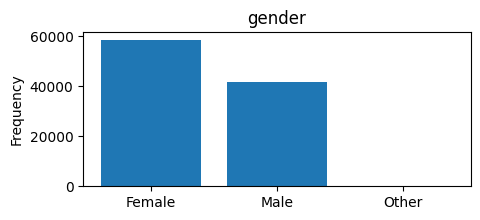

gender: 
 Female    58552
Male      41430
Other        18
Name: gender, dtype: int64


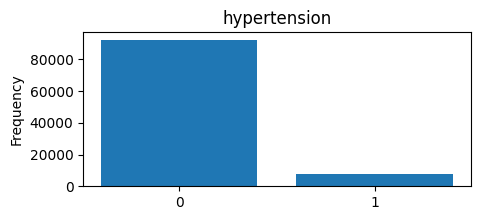

hypertension: 
 0    92515
1     7485
Name: hypertension, dtype: int64


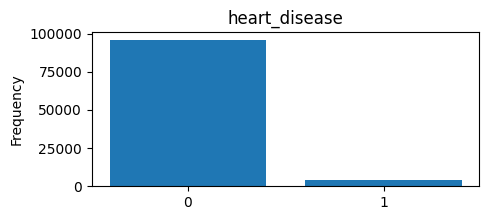

heart_disease: 
 0    96058
1     3942
Name: heart_disease, dtype: int64


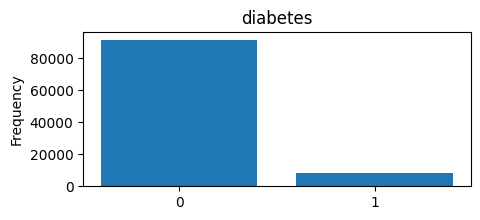

diabetes: 
 0    91500
1     8500
Name: diabetes, dtype: int64


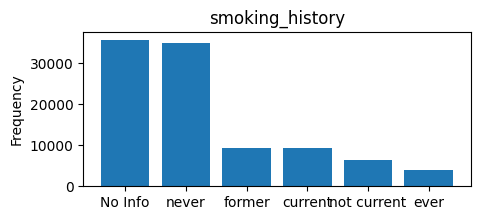

smoking_history: 
 No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


In [ ]:
def bar_plot(variable):
    """
        input: variable ex: "Gender"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (5,2))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
category1 = ["gender","hypertension","heart_disease","diabetes","smoking_history"]
for c in category1:
    bar_plot(c)

In [ ]:
df[["gender","diabetes"]].groupby(["gender"], as_index = False).mean().sort_values(by="gender",ascending = False)

,gender,diabetes
2,Other,0.000000
1,Male,0.097490
0,Female,0.076189


In [ ]:
df[["hypertension","diabetes"]].groupby(["hypertension"], as_index = False).mean().sort_values(by="hypertension",ascending = False)

,hypertension,diabetes
1,1,0.278958
0,0,0.069308


<ipython-input-9-1f394f85b3f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = ".2f")


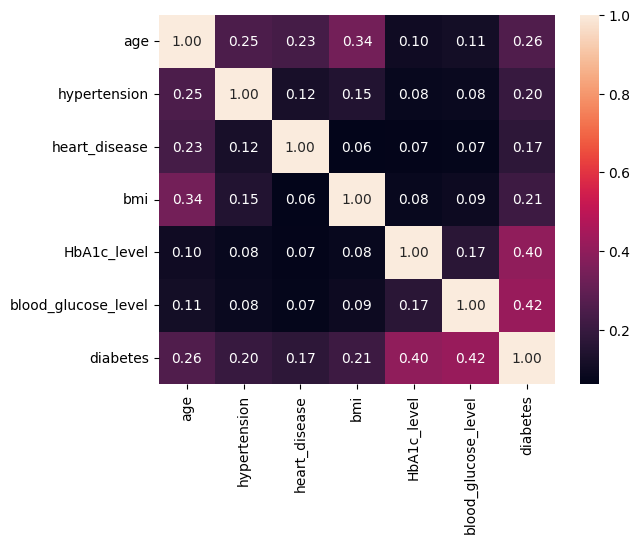

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

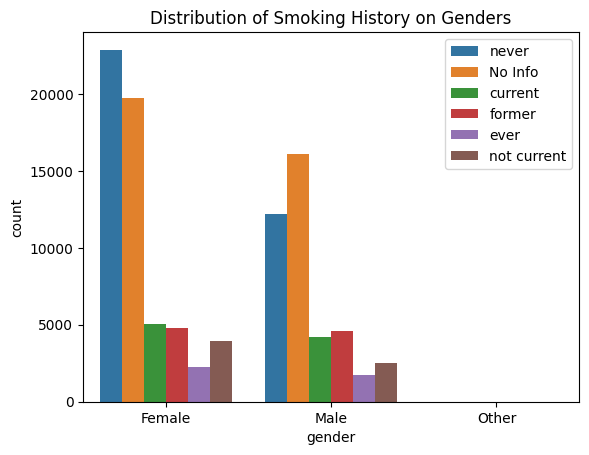

In [ ]:
sns.countplot(x = "gender", data = df, hue = "smoking_history")
plt.legend(loc = "upper right")
plt.title("Distribution of Smoking History on Genders")
plt.show()

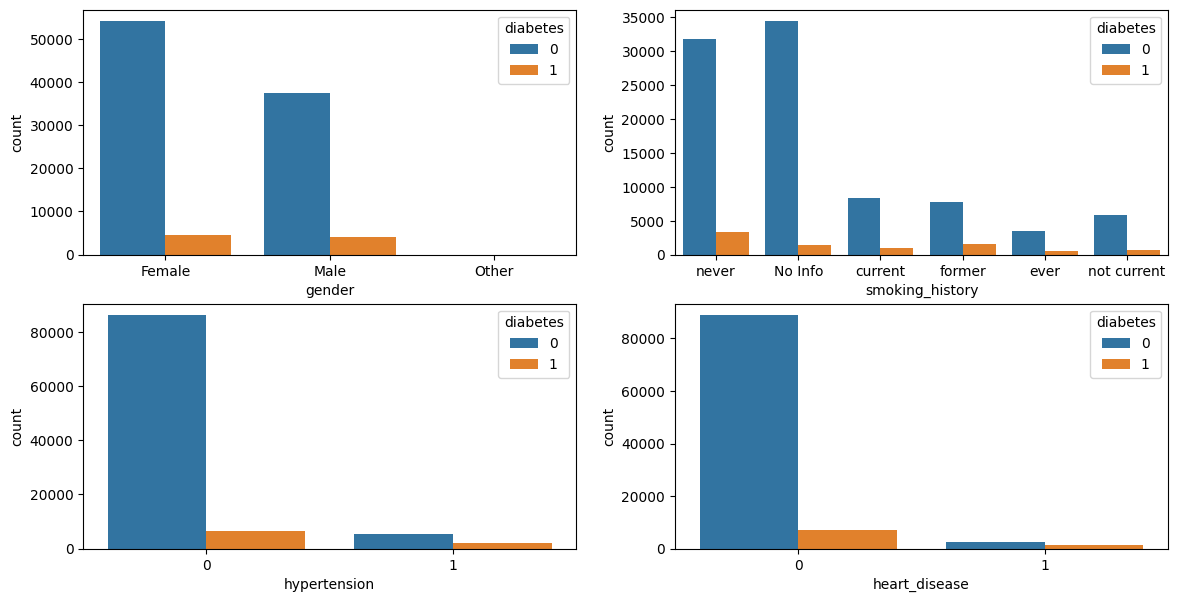

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14,7))

sns.countplot(ax = axes[0,0], data = df, x = "gender", hue = "diabetes")
sns.countplot(ax = axes[0,1], data = df, x = "smoking_history", hue = "diabetes")
sns.countplot(ax = axes[1,0], data = df, x = "hypertension", hue = "diabetes")
sns.countplot(ax = axes[1,1], data = df, x = "heart_disease", hue = "diabetes")
plt.show()

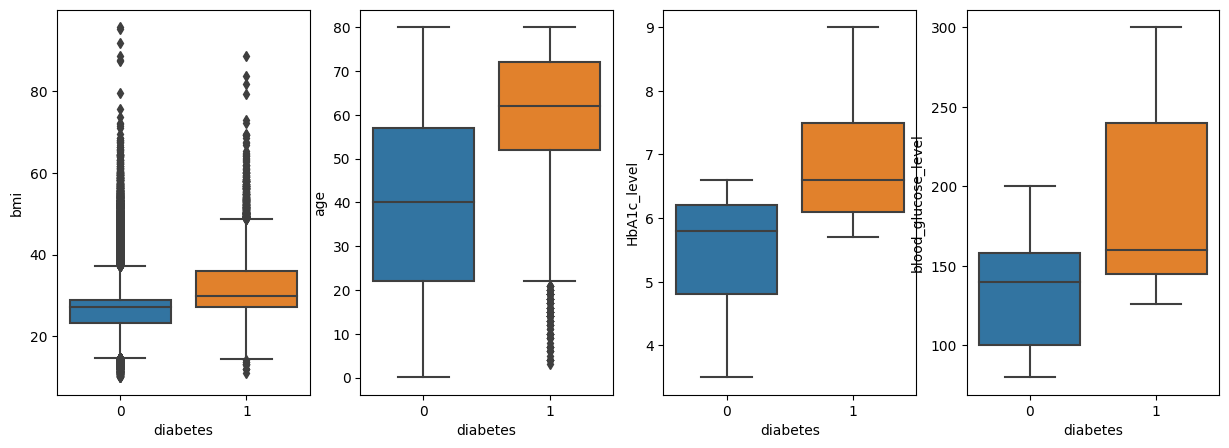

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15,5))
sns.boxplot(ax = axes[0],x = "diabetes", y = "bmi", data = df)
sns.boxplot(ax = axes[1],x = "diabetes", y = "age", data = df)
sns.boxplot(ax = axes[2],x = "diabetes", y = "HbA1c_level", data = df)
sns.boxplot(ax = axes[3],x = "diabetes", y = "blood_glucose_level",data = df)
plt.show()

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram plot.".format(variable))
    plt.show()

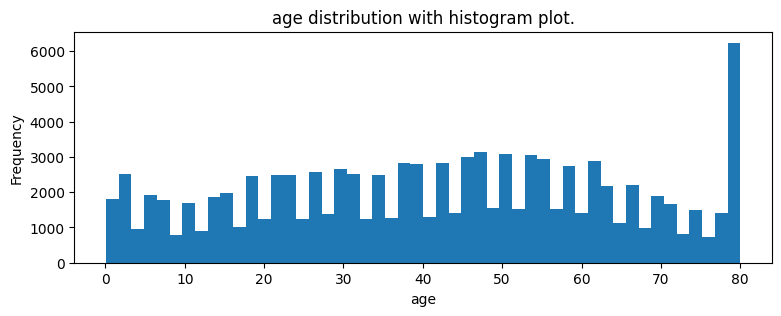

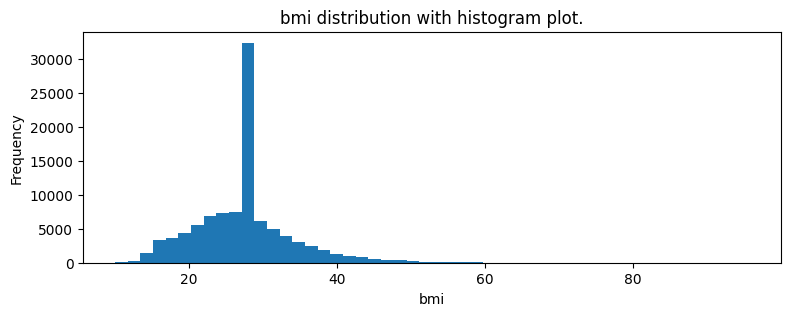

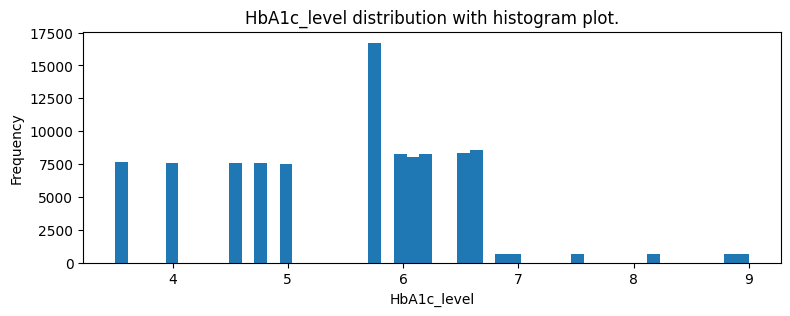

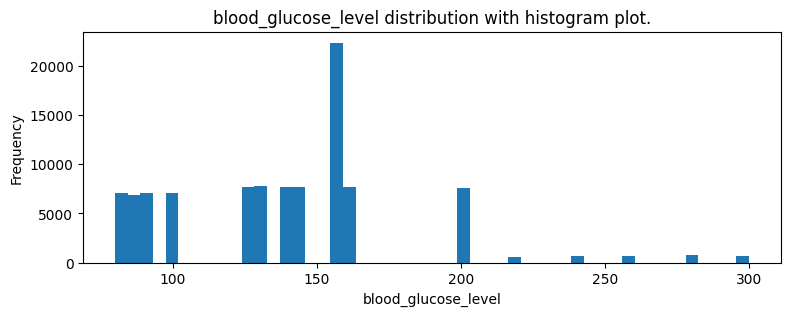

In [ ]:
numericVar = ["age","bmi","HbA1c_level", "blood_glucose_level"]
for n in numericVar:
    plot_hist(n)

[]

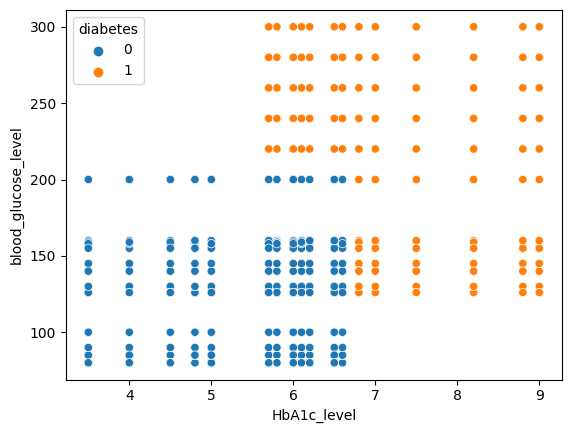

In [ ]:
sns.scatterplot(x = "HbA1c_level", y = "blood_glucose_level", hue = "diabetes", data = df)
plt.plot()